# Computational tools for data science - project

Laoading data and first exploratory analysis

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
netflix = pd.read_csv('data/netflix.csv')
amazon = pd.read_csv('data/amazon.csv')
hulu = pd.read_csv('data/hulu.csv')
apple = pd.read_csv('data/apple.csv')
hbo = pd.read_csv('data/hbo.csv')

#main = pd.read_csv('data/TMDB_all_movies.csv')

In [ ]:
main.head()

In [ ]:
netflix.head()

In [ ]:
# Remove TV shows (we only want movies)
def remove_tv_show(df):
    return df[df['type'] == 'movie']

print('Before removing shows')
print(netflix.shape)
print(amazon.shape)
print(hulu.shape)
print(apple.shape)
print(hbo.shape)

netflix = remove_tv_show(netflix)
apple = remove_tv_show(apple)
hulu = remove_tv_show(hulu)
amazon = remove_tv_show(amazon)
hbo = remove_tv_show(hbo)

#dimension of the dataset
print('After removing shows')
print(netflix.shape)
print(amazon.shape)
print(hulu.shape)
print(apple.shape)
print(hbo.shape)

In [ ]:
#add platform column to main dataset
def platform_column(main, platform, platform_name):
    for index, row in main.iterrows():
        if row['title'] in platform['title'].values: 
            main.loc[index, platform_name] = 1
        else:
            main.loc[index, platform_name] = 0
    return main

In [ ]:
#main_netflix = platform_column(main, netflix, 'Netflix')
#main_net_ama = platform_column(main_netflix, amazon, 'Amazon')
#main_net_ama_hulu = platform_column(main_net_ama, hulu, 'Hulu')
#main_net_ama_hulu_apple = platform_column(main_net_ama_hulu, apple, 'Apple')
#main_complete = platform_column(main_net_ama_hulu_apple, hbo, 'HBO')


In [ ]:
# load dataset
main_complete = pd.read_csv('data/main_complete.csv')
main_complete.head()

To not run

In [ ]:
#count the number of movies in each platform
def count_movies(df, platform_name):
    return df[platform_name].sum()

In [ ]:
netflix_count = count_movies(main_complete, 'Netflix')
print(netflix_count)
amazon_count = count_movies(main_complete, 'Amazon')
print(amazon_count)
hulu_count = count_movies(main_complete, 'Hulu')
print(hulu_count)
apple_count = count_movies(main_complete, 'Apple')
print(apple_count)
hbo_count = count_movies(main_complete, 'HBO')
print(hbo_count)

In [ ]:
#count the number of movies in more than one platform (take in consideration two, three and four platforms)
count = 0
for index, row in main_complete.iterrows():
    if row['Netflix'] + row['Amazon'] + row['Hulu'] + row['Apple'] + row['HBO']> 1:
        count += 1
print(count)

In [ ]:
#identify which movies are in more than one platform
def more_than_one_platform(df):
    return df[(df['Netflix'] + df['Amazon'] + df['Hulu'] + df['Apple'] + df['HBO']) > 1]

in_platforms = more_than_one_platform(main_complete)

In [ ]:
in_platforms

Run again

In [ ]:
main_complete.dtypes

## Simmilarity

we need to tokenize each feature into sets

for categorical features, we do one-hot encode to represent the presence or absence

 For MinHashing, you need each feature (e.g., genres, cast members) in each row (movie) to be a set of tokens. Convert strings like "Action|Adventure" into sets like {“Action”, “Adventure”}.

### Genres Analysis

In [9]:
# load dataset
main_complete = pd.read_csv('data/main_complete.csv')
# main_complete.head()

In [10]:
from pandas import DataFrame

main_genres = DataFrame()
main_genres = main_complete

In [11]:
# check how many movies have no genre
nulls = main_genres['genres'].isnull().sum()
print("This percentage of movies have no genre:", nulls/len(main_genres)*100)


This percentage of movies have no genre: 29.076318106153554


We need to create a set with the different genres in each movie

In [14]:
# split the genres into a set of genres and remove spaces
main_genres['genres'] = main_genres['genres'].apply(lambda x: set(genre.strip() for genre in x.split(',')) if pd.notnull(x) else set())

In [15]:
# THIS IS JUST TO VISUALIZE THE GENRES
# check how many different genres are taking into account the content of the lists
genres = set()
for list in main_genres['genres']:
    # if list is not NaN
    if list is not np.nan:
        for genre in list:
            # remove the space at the beginning of the string if there is one
            genre = genre.strip()
            genres.add(genre)
print("There are ", len(genres), "different genres in the dataset")

There are  19 different genres in the dataset


In [16]:
print("The genres are:", genres)

The genres are: {'Animation', 'Science Fiction', 'History', 'Family', 'Fantasy', 'Mystery', 'Horror', 'Thriller', 'Romance', 'Comedy', 'Crime', 'Western', 'Music', 'War', 'Documentary', 'Drama', 'Action', 'TV Movie', 'Adventure'}


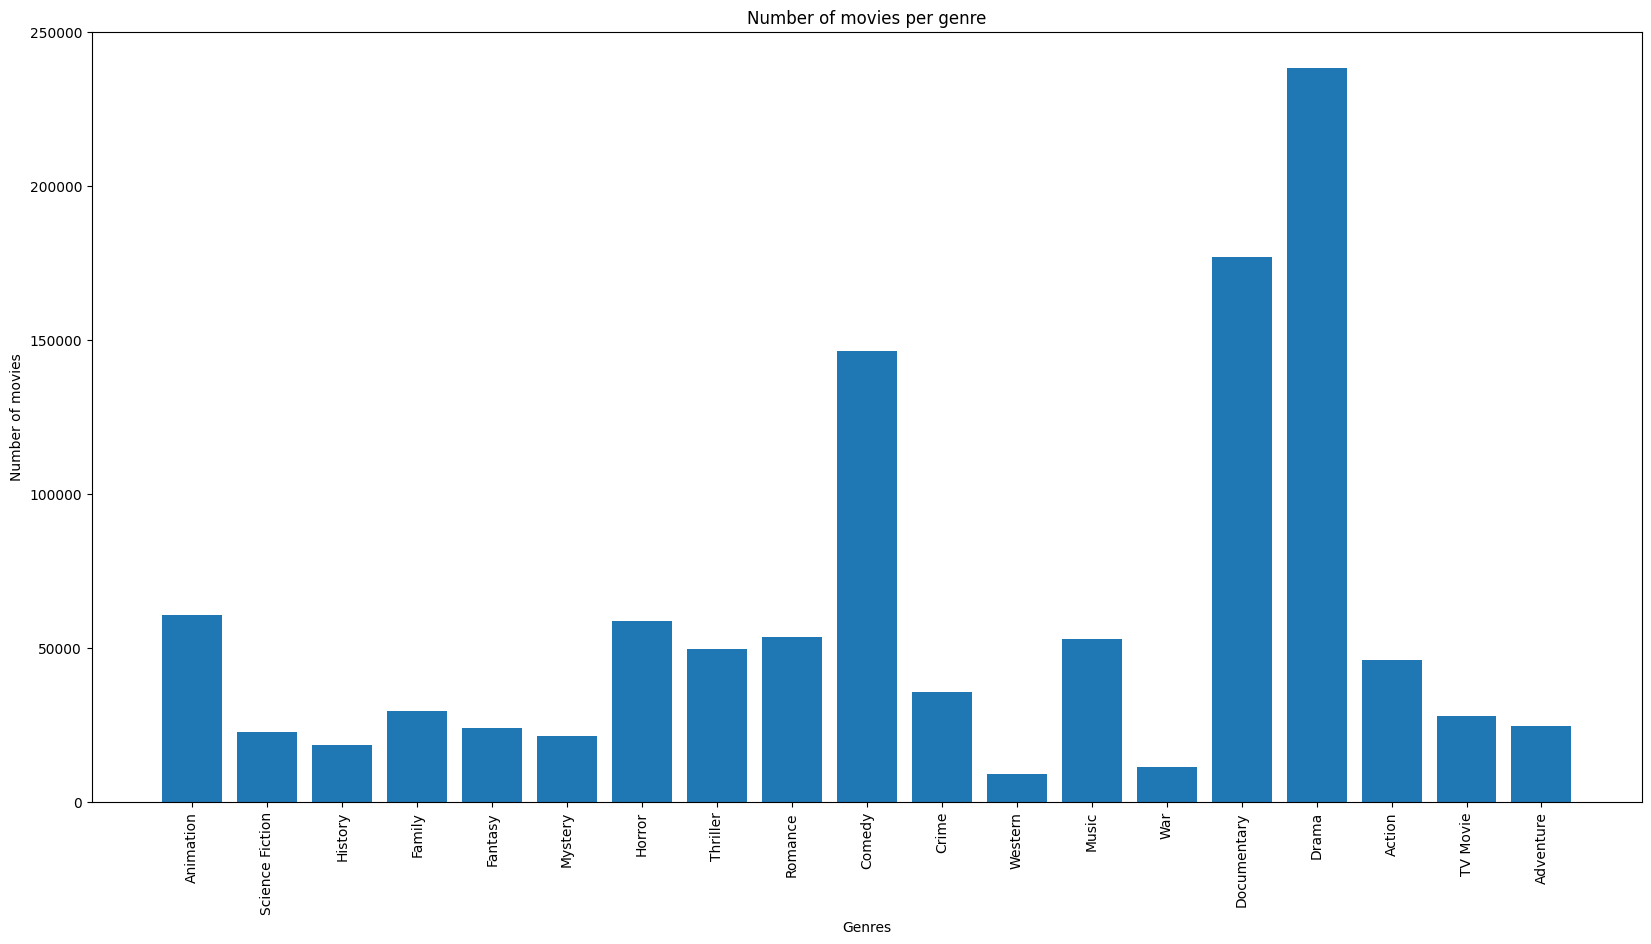

In [17]:
# THIS IS JUST TO VISUALIZE
# plot the histogram of genres
genres_count = {genre: 0 for genre in genres}
for genre_list in main_genres['genres']:
    if genre_list is not np.nan:
        for genre in genre_list:
            genre = genre.strip()
            genres_count[genre] += 1

# histogram
plt.figure(figsize=(20, 10))
plt.bar(genres_count.keys(), genres_count.values())
plt.xticks(rotation=90)
plt.xlabel('Genres')
plt.ylabel('Number of movies')
plt.title('Number of movies per genre')
plt.show()

### Cast and crew

In [18]:
# split the cast into a set of cast and remove spaces
main_genres['cast'] = main_genres['cast'].apply(lambda x: set(actor.strip() for actor in x.split(',')) if pd.notnull(x) else set())

In [19]:
main_genres['cast']

0          {Erkki Pajala, Esko Nikkari, Marja Packalén, M...
1          {Malla Hukkanen, Kylli Köngäs, Esko Nikkari, S...
2          {Unruly Julie McClean, Marisa Tomei, Quinn Hel...
3          {Sean O'Grady, Stuart Abramson, Everlast, Mich...
4                                                         {}
                                 ...                        
1009834                                                   {}
1009835                                                   {}
1009836                                                   {}
1009837    {Edgar Moro, Carlos Alejandro López, Alexia Mo...
1009838    {Kollin Holtz, Edwin Hodge, Len Cariou, Sachin...
Name: cast, Length: 1009839, dtype: object

In [20]:
# main_genres['cast']

# # split the cast into a list of actors
# main_genres['cast'] = main_genres['cast'].str.split(',')


# # check how many different actors are taking into account the content of the lists
# actors = set()
# for list in main_genres['cast']:
#     # if list is not NaN
#     if list is not np.nan:
#         for actor in list:
#             # remove the space at the beginning of the string if there is one
#             actor = actor.strip()
#             actors.add(actor)
# actors.remove('')
# print("There are ", len(actors), "different actors in the dataset")

In [21]:
# how many movies have no cast
nulls = main_genres['cast'].apply(lambda x: len(x) == 0).sum()
print("This percentage of movies have no cast:", nulls/len(main_genres)*100)

This percentage of movies have no cast: 33.29124741666741


create a column called "crew" with sets of director, director_of_photography, writers, music_composer and producers. Remove the columns of these ones

In [22]:
columns_to_merge = ['director', 'director_of_photography', 'writers', 'music_composer', 'producers']

for column in columns_to_merge:
    main_genres[column] = main_genres[column].apply(lambda x: set(person.strip() for person in x.split(',')) if pd.notnull(x) else set())

main_genres['crew'] = main_genres.apply(lambda row: set.union(row['director'], row['director_of_photography'], row['writers'], row['music_composer'], row['producers']), axis=1)

# Drop the individual columns
main_genres.drop(columns=columns_to_merge, inplace=True)

# main_genres['crew']

In [23]:
main_genres['crew'][2]

{'Alexandre Rockwell',
 'Allison Anders',
 'Andrzej Sekula',
 'Combustible Edison',
 'Guillermo Navarro',
 'Lawrence Bender',
 'Phil Parmet',
 'Quentin Tarantino',
 'Robert Rodriguez',
 'Rodrigo García'}

In [24]:
# how many movies have no crew
nulls = main_genres['crew'].apply(lambda x: len(x) == 0).sum()
print("This percentage of movies have no crew:", nulls/len(main_genres)*100)

This percentage of movies have no crew: 16.80178721558585


Production companies and countries

production_companies, production_countries 

In [25]:
# split the production_companies into a set and remove spaces
main_genres['production_companies'] = main_genres['production_companies'].apply(lambda x: set(company.strip() for company in x.split(',')) if pd.notnull(x) else set())

In [26]:
main_genres['production_companies'][3]

{'JVC', 'Largo Entertainment', 'Universal Pictures'}

In [27]:
# percentage of movies with no production companies
nulls = main_genres['production_companies'].apply(lambda x: len(x) == 0).sum()
print("This percentage of movies have no production companies:", nulls/len(main_genres)*100)

This percentage of movies have no production companies: 53.91235632610743


In [28]:
main_genres['production_countries'] = main_genres['production_countries'].apply(lambda x: set(country.strip() for country in x.split(',')) if pd.notnull(x) else set())

In [29]:
main_genres['production_countries']

0                           {Finland}
1                           {Finland}
2          {United States of America}
3          {United States of America}
4                           {Austria}
                      ...            
1009834                            {}
1009835                            {}
1009836                            {}
1009837                            {}
1009838                            {}
Name: production_countries, Length: 1009839, dtype: object

In [30]:
# percentage of movies with no production countries
nulls = main_genres['production_countries'].apply(lambda x: len(x) == 0).sum()
print("This percentage of movies have no production countries:", nulls/len(main_genres)*100)

This percentage of movies have no production countries: 39.518774774988884


In [31]:
# Perform one-hot encoding for the genres
genres_dummies = main_genres['genres'].str.join('|').str.get_dummies()

# Concatenate the one-hot encoded genres with the main_genres dataframe
main_genres = pd.concat([main_genres, genres_dummies], axis=1)

# Display the updated dataframe
main_genres.head()

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,budget,imdb_id,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,2,Ariel,7.1,330.0,Released,1988-10-21,0.0,73.0,0.0,tt0094675,...,0,0,0,0,1,0,0,0,0,0
1,3,Shadows in Paradise,7.3,369.0,Released,1986-10-17,0.0,74.0,0.0,tt0092149,...,0,0,0,0,1,0,0,0,0,0
2,5,Four Rooms,5.8,2623.0,Released,1995-12-09,4257354.0,98.0,4000000.0,tt0113101,...,0,0,0,0,0,0,0,0,0,0
3,6,Judgment Night,6.5,331.0,Released,1993-10-15,12136938.0,109.0,21000000.0,tt0107286,...,0,0,0,0,0,0,0,1,0,0
4,8,Life in Loops (A Megacities RMX),7.5,27.0,Released,2006-01-01,0.0,80.0,42000.0,tt0825671,...,0,0,0,0,0,0,0,0,0,0


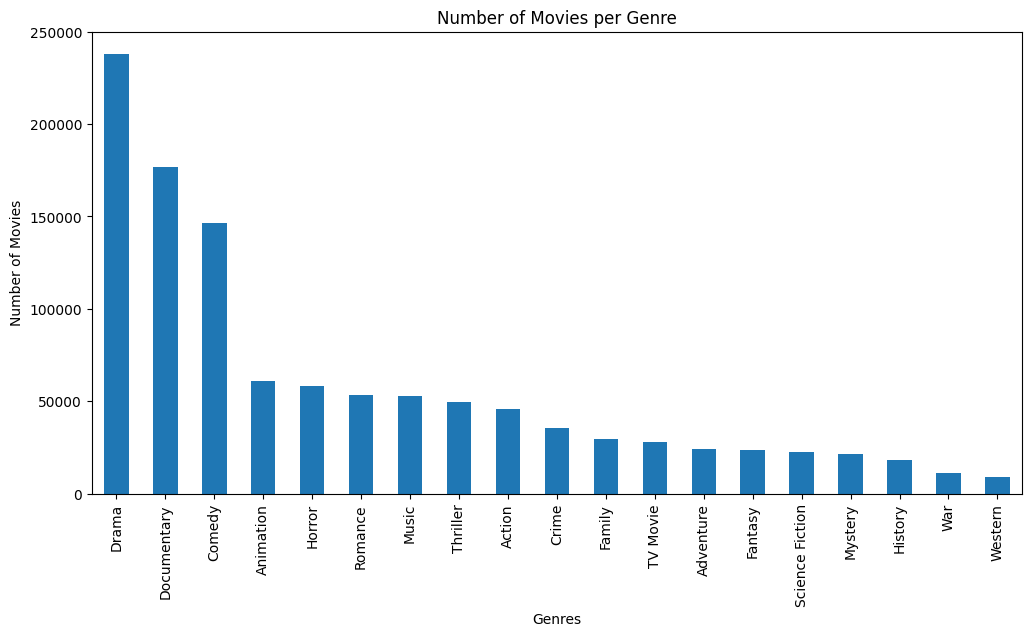

,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,0,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0
1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [33]:

genres_dummies.sum().sort_values(ascending=False).plot(kind='bar', figsize=(12, 6))
plt.xlabel('Genres')
plt.ylabel('Number of Movies')
plt.title('Number of Movies per Genre')
plt.show()
genres_dummies.head()

## Sentiment Analysis

Overview and title Analysis